In [4]:
from pylab import*
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def BlackBody(w,T) :
    h = 6.62606957e-34 # joule·s 
    c = 2.99792458e8 # Speed of light in m/s 
    k = 1.38e-23 # Boltzmann constant in m^2 kg / s^2 / K  
    intensity = (2*h*c**2/w**5)*(1/(np.exp((h*c)/(w*k*T))- 1))
    return intensity

def BlackBodySun(w,T,R_sun_earth=149600000):
    R_sun=696340 
    return BlackBody(w,T)*(R_sun/R_sun_earth)**2*1.0e-9*np.pi

def k_b(T): 
    return 5.670374419e-8*T**4

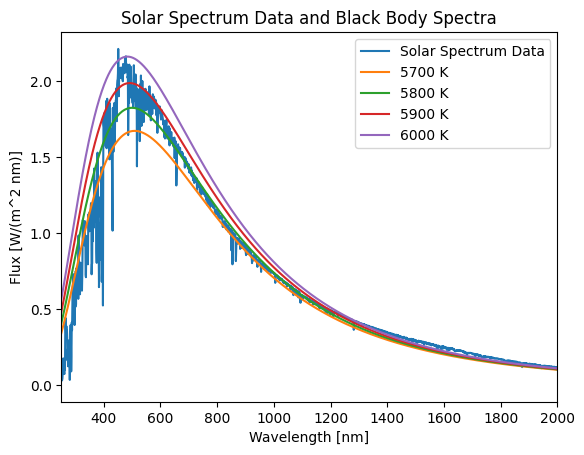

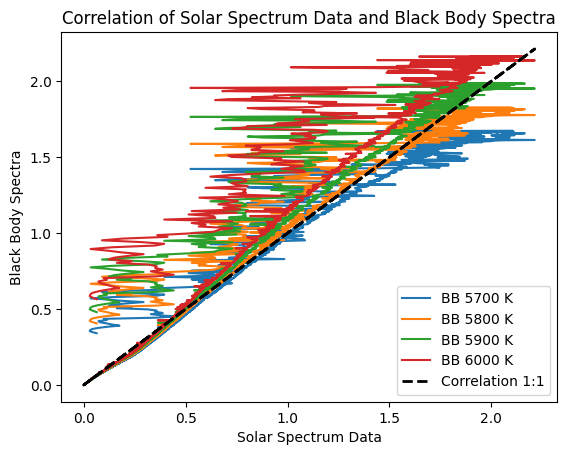

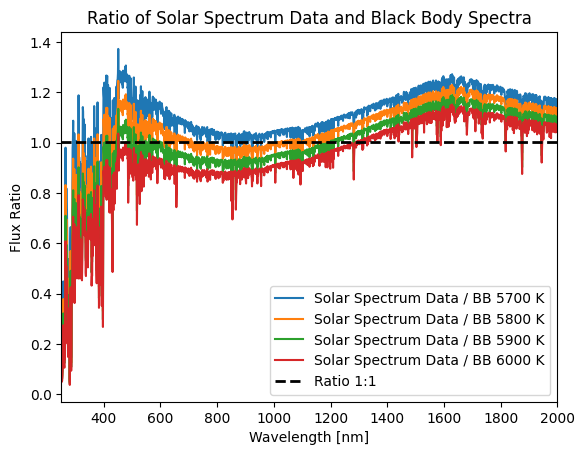

In [6]:
solar_spectrum = np.loadtxt('kurudz_1.0nm.dat')
lambda_solar = solar_spectrum[:,0]
solar_flux = solar_spectrum[:,1]*10**(-3)

Temps= [5700, 5800, 5900, 6000]
BlackBodies = [BlackBodySun(lambda_solar*10**(-9), T) for T in Temps]

Ratio = [solar_flux/BlackBodies[i] for i in range(4)]

figure()
plot(lambda_solar, solar_flux, label='Solar Spectrum Data')
plot(lambda_solar, BlackBodies[0], label='5700 K')
plot(lambda_solar, BlackBodies[1], label='5800 K')
plot(lambda_solar, BlackBodies[2], label='5900 K')
plot(lambda_solar, BlackBodies[3], label='6000 K')
xlabel('Wavelength [nm]'), xlim(250, 2000)
ylabel('Flux [W/(m^2 nm)]')
title('Solar Spectrum Data and Black Body Spectra')
legend()
show()

figure()
plot(solar_flux, BlackBodies[0], label='BB 5700 K')
plot(solar_flux, BlackBodies[1], label='BB 5800 K')
plot(solar_flux, BlackBodies[2], label='BB 5900 K')
plot(solar_flux, BlackBodies[3], label='BB 6000 K')
plot(solar_flux, solar_flux, label='Correlation 1:1', linestyle='--', color='black', linewidth=2)
xlabel('Solar Spectrum Data')
ylabel('Black Body Spectra')
title('Correlation of Solar Spectrum Data and Black Body Spectra')
legend()
show()

figure()
plot(lambda_solar, Ratio[0], label='Solar Spectrum Data / BB 5700 K')
plot(lambda_solar, Ratio[1], label='Solar Spectrum Data / BB 5800 K')
plot(lambda_solar, Ratio[2], label='Solar Spectrum Data / BB 5900 K')
plot(lambda_solar, Ratio[3], label='Solar Spectrum Data / BB 6000 K')
plot(lambda_solar, np.ones_like(lambda_solar), label='Ratio 1:1', linestyle='--', color='black', linewidth=2)
xlabel('Wavelength [nm]'), xlim(250, 2000)
ylabel('Flux Ratio')
title('Ratio of Solar Spectrum Data and Black Body Spectra')
legend()
show()